In [1]:

import pandas as pd

df = pd.read_csv('/content/train.csv')

df.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500



Размерность в датасете — это показатель, который определяет, сколько признаков имеет набор данных.

Тут их 9, значит размерность датасета - 9.


In [2]:
c=df.isna().sum()
c

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [3]:
df.isnull().sum().sum ()

0

В датасете *нет* пустых значений

In [4]:
df.dtypes

id               int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Во всех столбцах содержится нецелое число

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt



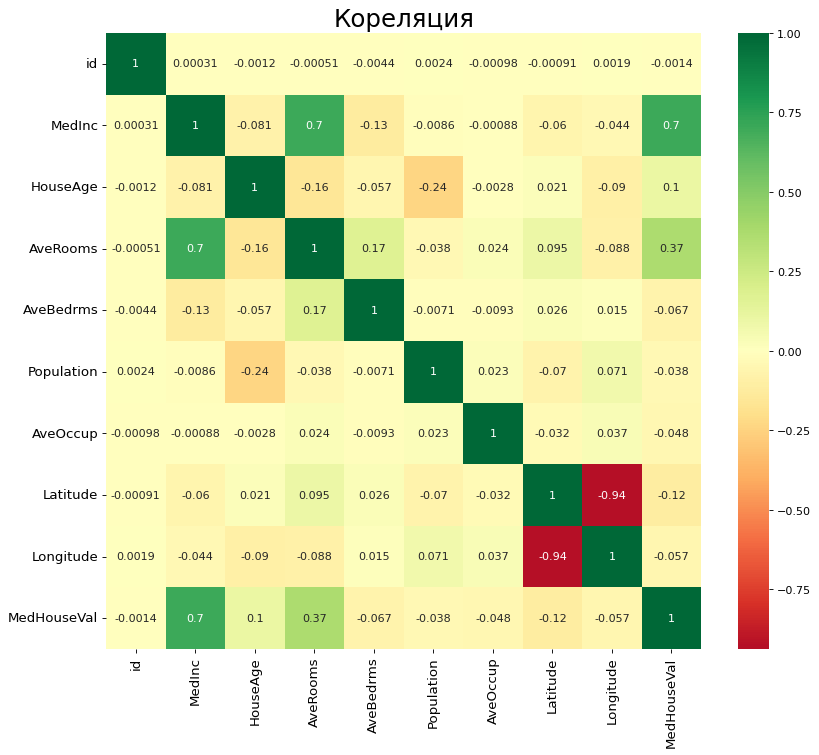

In [10]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Кореляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наиболее сильная кореляция между latitude и longitude

Text(0.5, 1.0, 'MedHouseVal')

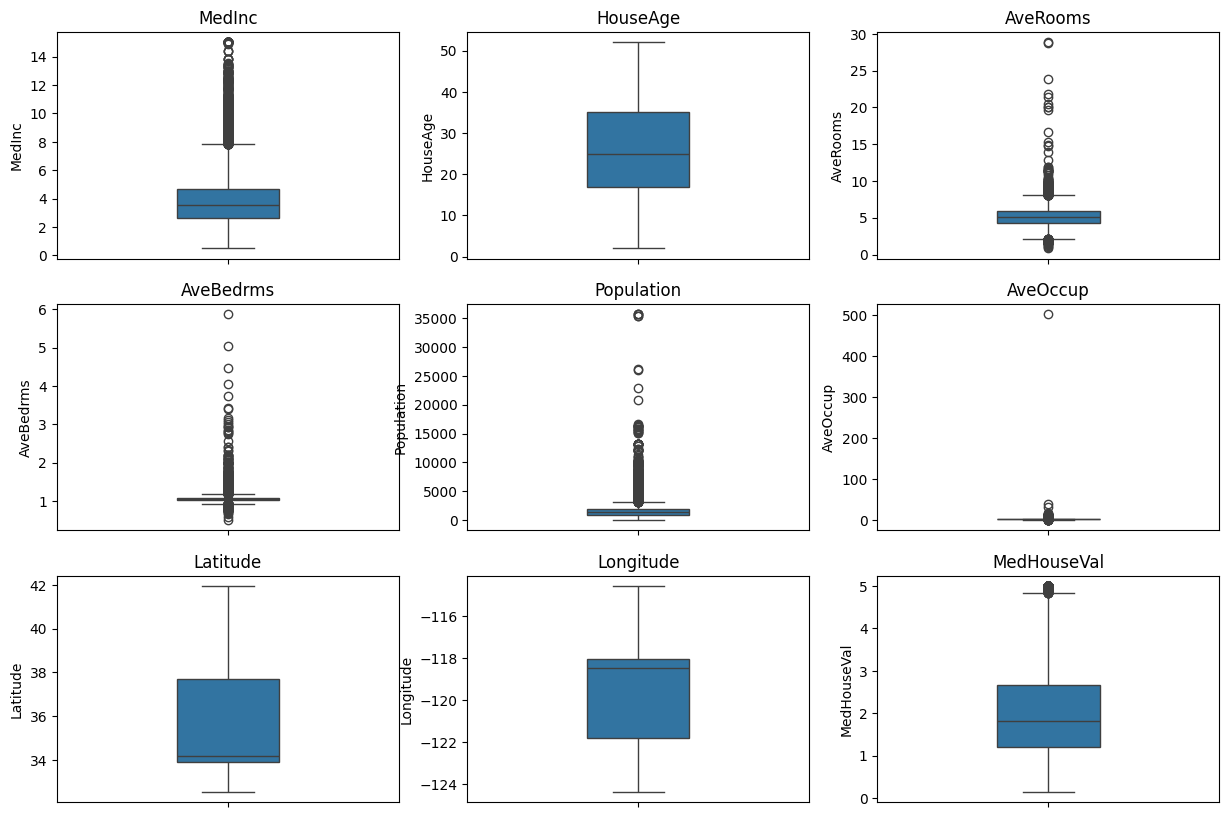

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(df['MedInc'], ax=axes[0][0], width=0.3).set_title('MedInc')
sns.boxplot(df['HouseAge'], ax=axes[0][1], width=0.3).set_title('HouseAge')
sns.boxplot(df['AveRooms'], ax=axes[0][2], width=0.3).set_title('AveRooms')
sns.boxplot(df['AveBedrms'], ax=axes[1][0], width=0.3).set_title('AveBedrms')
sns.boxplot(df['Population'], ax=axes[1][1], width=0.3).set_title('Population')
sns.boxplot(df['AveOccup'], ax=axes[1][2], width=0.3).set_title('AveOccup')
sns.boxplot(df['Latitude'], ax=axes[2][0], width=0.3).set_title('Latitude')
sns.boxplot(df['Longitude'], ax=axes[2][1], width=0.3).set_title('Longitude')
sns.boxplot(df['MedHouseVal'], ax=axes[2][2], width=0.3).set_title('MedHouseVal')



Выбросы отсутствуют только в latitude, longitude, housage


In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Вектор признаков
X = df.drop(columns=['MedHouseVal', 'id'])

# Вектор целевой переменной
Y = df['MedHouseVal']



In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (24758, 8), (24758,)
Test dataset size: (12379, 8), (12379,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
print('Веса всех признаков (w1, ..., w13): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1, ..., w13):  [ 4.85931359e-01  8.61106816e-03 -1.51462846e-01  1.10149526e+00
 -1.38320302e-05 -1.11440336e-02 -4.06567778e-01 -4.21051338e-01]
Свободный коэффицент уравнения w0: -36.23201681061755


In [48]:
features = X_train.columns

coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
7,-0.421051,Longitude
6,-0.406568,Latitude
2,-0.151463,AveRooms
5,-0.011144,AveOccup
4,-0.000014,Population
1,0.008611,HouseAge
0,0.485931,MedInc
3,1.101495,AveBedrms


Уравнение регрессии:
y=-36.2+0.485931*MedInc+0.008611*Housage-0.15*AveRooms+1*Avebdrms-0,00*Population-0.01*AveOccup-0.4*Latitude-0.4*Longitude



Признак Population самый невесомый, признак Avebedrms самый весомый

In [49]:
y_pred = model.predict(X_test)

In [50]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))


Mean Absolute Error: 0.5416410484226032
Mean Squared Error: 0.5487149180386056
R2 score: 0.5923465814835409


MAE и MSE близки к своему идеалу, к 0
чем ближе  R2  к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в  Y  объясняется независимой переменной  X .


Таким образом, мы можем сделать вывод, что модель обучилась хорошо.